## CMS Nursing Home COVID-19 Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_nh = pd.read_csv('Datasets/nm_data.csv')

<ipython-input-2-008a760cc10b>:1: DtypeWarning: Columns (1,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nh = pd.read_csv('Datasets/nm_data.csv')


In [3]:
df_nh

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816446,07/31/22,745006,FIVE POINTS NURSING AND REHABILITATION,1901 N. HAMPTON RD.,DESOTO,TX,75115,9726949810,Dallas,Y,...,0.0,0.0,19.0,NaN,26.027,19.0,NaN,19.388,19.588,26.027
1816447,08/07/22,745006,FIVE POINTS NURSING AND REHABILITATION,1901 N. HAMPTON RD.,DESOTO,TX,75115,9726949810,Dallas,Y,...,0.0,0.0,18.0,NaN,26.087,18.0,NaN,19.149,19.355,26.087
1816448,08/14/22,745006,FIVE POINTS NURSING AND REHABILITATION,1901 N. HAMPTON RD.,DESOTO,TX,75115,9726949810,Dallas,Y,...,0.0,0.0,21.0,NaN,30.882,21.0,NaN,23.864,24.138,30.882
1816449,08/21/22,745006,FIVE POINTS NURSING AND REHABILITATION,1901 N. HAMPTON RD.,DESOTO,TX,75115,9726949810,Dallas,Y,...,0.0,0.0,22.0,NaN,30.986,22.0,NaN,25.000,25.287,30.986


### **Task 1:** Conduct a facility and county level analysis on shortage of aides, clinical staff, nursing staff and other staff. Define the following metric for this analysis: number of weeks the shortage was experienced. The metric should be categorized into 3 categories, 0-10, 11-20 and >20 weeks.

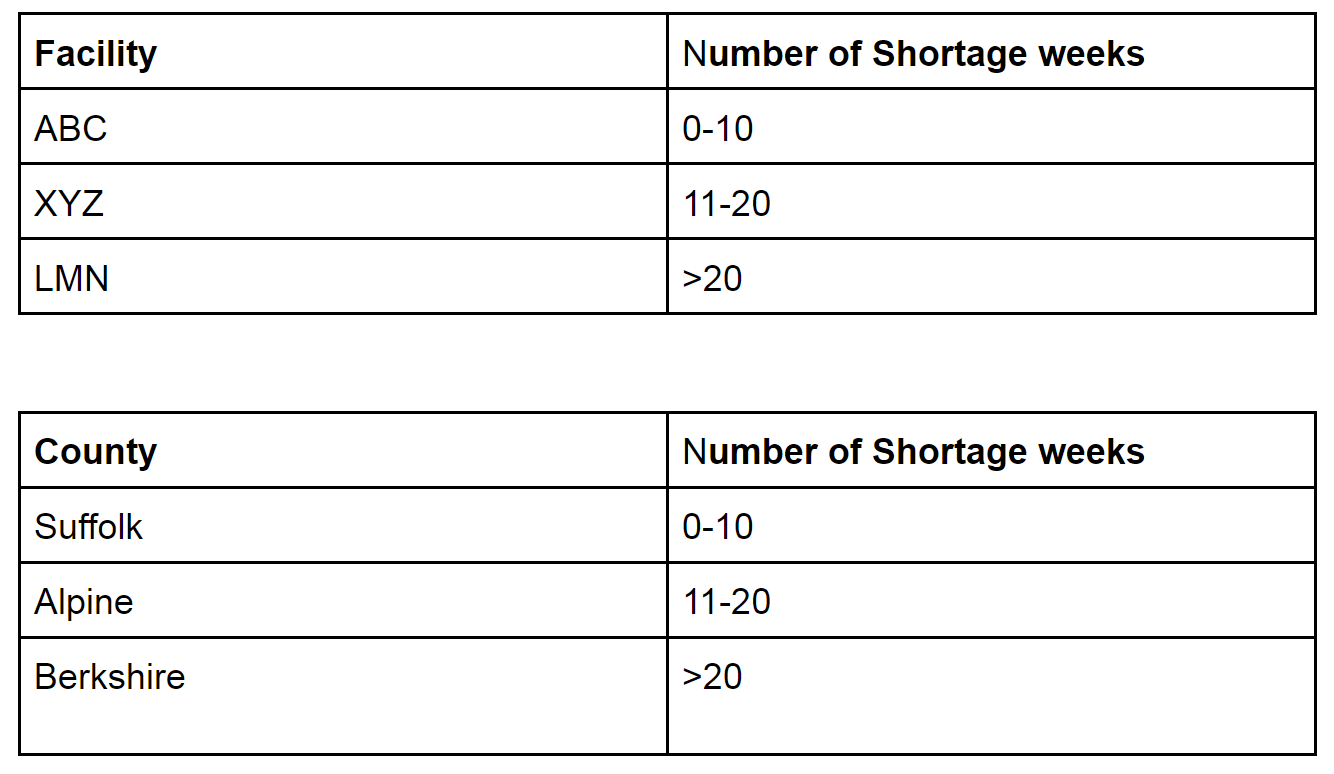


In [4]:
cols = list(df_nh.columns)
cols

['Week Ending',
 'Federal Provider Number',
 'Provider Name',
 'Provider Address',
 'Provider City',
 'Provider State',
 'Provider Zip Code',
 'Provider Phone Number',
 'County',
 'Submitted Data',
 'Passed Quality Assurance Check',
 'Residents Weekly Admissions COVID-19',
 'Residents Total Admissions COVID-19',
 'Residents Weekly Confirmed COVID-19',
 'Residents Total Confirmed COVID-19',
 'Residents Weekly All Deaths',
 'Residents Total All Deaths',
 'Residents Weekly COVID-19 Deaths',
 'Residents Total COVID-19 Deaths',
 'Number of All Beds',
 'Total Number of Occupied Beds',
 'Staff Weekly Confirmed COVID-19',
 'Staff Total Confirmed COVID-19',
 'Staff Weekly COVID-19 Deaths',
 'Staff Total COVID-19 Deaths',
 'Shortage of Nursing Staff',
 'Shortage of Clinical Staff',
 'Shortage of Aides',
 'Shortage of Other Staff',
 'Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents',
 'Weekly Resident COVID-19 Deaths Per 1,000 Residents',
 'Total Resident Confirmed COVID-19 Cases Per 

In [5]:
df_nh2 = df_nh.copy()

In [6]:
df_nh2["Shortage of Nursing Staff"] = np.where(df_nh2["Shortage of Nursing Staff"] == 'Y' , 1, 0)
df_nh2["Shortage of Clinical Staff"] = np.where(df_nh2["Shortage of Clinical Staff"] == 'Y' , 1, 0)
df_nh2["Shortage of Aides"] = np.where(df_nh2["Shortage of Aides"] == 'Y' , 1, 0)
df_nh2["Shortage of Other Staff"] = np.where(df_nh2["Shortage of Other Staff"] == 'Y' , 1, 0)
df_nh2["Shortage of Nursing Staff"].value_counts()

0    1472582
1     343869
Name: Shortage of Nursing Staff, dtype: int64

In [7]:
shortages_df = df_nh2.groupby(['Federal Provider Number', 'Provider Name'], as_index='False')[['Shortage of Nursing Staff',
 'Shortage of Clinical Staff',
 'Shortage of Aides',
 'Shortage of Other Staff',]].sum()
shortages_df

,,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff
Federal Provider Number,Provider Name,,,,
15009,"BURNS NURSING HOME, INC.",5,2,5,3
15010,COOSA VALLEY HEALTHCARE CENTER,0,2,0,0
15012,HIGHLANDS HEALTH AND REHAB,0,0,1,0
15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,21,7,7,7
15015,PLANTATION MANOR NURSING HOME,3,0,3,0
...,...,...,...,...,...
555113,LAKE PARK RETIREMENT RESIDENCE,0,0,0,0
555114,DRIFTWOOD HEALTHCARE CENTER,0,0,0,0
555115,OAKHURST HEALTHCARE CENTER,0,0,0,0


In [8]:
shortages_df["Shortage of Nursing Staff"] = np.where(
    (shortages_df["Shortage of Nursing Staff"] >= 0) & (shortages_df["Shortage of Nursing Staff"] <= 10), '0-10',
    np.where(
        (shortages_df["Shortage of Nursing Staff"] > 10) & (shortages_df["Shortage of Nursing Staff"] <= 20), '11-20',
        '>20'
    )
)

shortages_df["Shortage of Nursing Staff"].value_counts()

0-10     9425
>20      4927
11-20    1204
Name: Shortage of Nursing Staff, dtype: int64

In [9]:
shortages_df["Shortage of Clinical Staff"] = np.where(
    (shortages_df["Shortage of Clinical Staff"] >= 0) & (shortages_df["Shortage of Clinical Staff"] <= 10), '0-10',
    np.where(
        (shortages_df["Shortage of Clinical Staff"] > 10) & (shortages_df["Shortage of Clinical Staff"] <= 20), '11-20',
        '>20'
    )
)

shortages_df["Shortage of Clinical Staff"].value_counts()

0-10     14767
>20        460
11-20      329
Name: Shortage of Clinical Staff, dtype: int64

In [10]:
shortages_df["Shortage of Other Staff"] = np.where(
    (shortages_df["Shortage of Other Staff"] >= 0) & (shortages_df["Shortage of Other Staff"] <= 10), '0-10',
    np.where(
        (shortages_df["Shortage of Other Staff"] > 10) & (shortages_df["Shortage of Other Staff"] <= 20), '11-20',
        '>20'
    )
)

shortages_df["Shortage of Other Staff"].value_counts()

0-10     11645
>20       2912
11-20      999
Name: Shortage of Other Staff, dtype: int64

In [11]:
shortages_df["Shortage of Aides"] = np.where(
    (shortages_df["Shortage of Aides"] >= 0) & (shortages_df["Shortage of Aides"] <= 10), '0-10',
    np.where(
        (shortages_df["Shortage of Aides"] > 10) & (shortages_df["Shortage of Aides"] <= 20), '11-20',
        '>20'
    )
)

shortages_df["Shortage of Aides"].value_counts()

0-10     9077
>20      5294
11-20    1185
Name: Shortage of Aides, dtype: int64

In [12]:
shortages_df

,,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff
Federal Provider Number,Provider Name,,,,
15009,"BURNS NURSING HOME, INC.",0-10,0-10,0-10,0-10
15010,COOSA VALLEY HEALTHCARE CENTER,0-10,0-10,0-10,0-10
15012,HIGHLANDS HEALTH AND REHAB,0-10,0-10,0-10,0-10
15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,>20,0-10,0-10,0-10
15015,PLANTATION MANOR NURSING HOME,0-10,0-10,0-10,0-10
...,...,...,...,...,...
555113,LAKE PARK RETIREMENT RESIDENCE,0-10,0-10,0-10,0-10
555114,DRIFTWOOD HEALTHCARE CENTER,0-10,0-10,0-10,0-10
555115,OAKHURST HEALTHCARE CENTER,0-10,0-10,0-10,0-10


In [13]:
shortages_df2 = df_nh2.groupby(['Provider State', 'County'], as_index='False')[['Shortage of Nursing Staff',
 'Shortage of Clinical Staff',
 'Shortage of Aides',
 'Shortage of Other Staff']].sum()
shortages_df2

Shortage of Nursing Staff  \
Provider State County                                        
AK             Anchorage                               237   
               Bethel                                    1   
               Cordova-Mccarthy                         22   
               Fairbanks                                 6   
               Juneau                                   41   
...                                                    ...   
WY             Sweetwater                               67   
               Teton                                    49   
               Uinta                                    86   
               Washakie                                 49   
               Weston                                   20   

                                 Shortage of Clinical Staff  \
Provider State County                                         
AK             Anchorage                                  4   
               Bethel                                     1   
               Cordova-Mccarthy                           2   
               Fairbanks                                  0   
               Juneau                                     0   
...                                                     ...   
WY             Sweetwater                                10   
               Teton                                     34   
               Uinta                                      0   
               Washakie                                   1   
               Weston                                     2   

                                 Shortage of Aides  Shortage of Other Staff  
Provider State County                                                        
AK             Anchorage                       232                       90  
               Bethel                           31                        0  
               Cordova-Mccarthy                 19                        2  
               Fairbanks                        25                        1  
               Juneau                          102                       46  
...                                            ...                      ...  
WY             Sweetwater                       76                       12  
               Teton                            49                       20  
               Uinta                            83                       22  
               Washakie                         49                        1  
               Weston                           34                        5  

[2897 rows x 4 columns]

In [14]:
shortages_df2["Shortage of Nursing Staff"] = np.where(
    (shortages_df2["Shortage of Nursing Staff"] >= 0) & (shortages_df2["Shortage of Nursing Staff"] <= 10), '0-10',
    np.where(
        (shortages_df2["Shortage of Nursing Staff"] > 10) & (shortages_df2["Shortage of Nursing Staff"] <= 20), '11-20',
        '>20'
    )
)

shortages_df2["Shortage of Clinical Staff"] = np.where(
    (shortages_df2["Shortage of Clinical Staff"] >= 0) & (shortages_df2["Shortage of Clinical Staff"] <= 10), '0-10',
    np.where(
        (shortages_df2["Shortage of Clinical Staff"] > 10) & (shortages_df2["Shortage of Clinical Staff"] <= 20), '11-20',
        '>20'
    )
)

shortages_df2["Shortage of Aides"] = np.where(
    (shortages_df2["Shortage of Aides"] >= 0) & (shortages_df2["Shortage of Aides"] <= 10), '0-10',
    np.where(
        (shortages_df2["Shortage of Aides"] > 10) & (shortages_df2["Shortage of Aides"] <= 20), '11-20',
        '>20'
    )
)

shortages_df2["Shortage of Other Staff"] = np.where(
    (shortages_df2["Shortage of Other Staff"] >= 0) & (shortages_df2["Shortage of Other Staff"] <= 10), '0-10',
    np.where(
        (shortages_df2["Shortage of Other Staff"] > 10) & (shortages_df2["Shortage of Other Staff"] <= 20), '11-20',
        '>20'
    )
)

shortages_df2

Shortage of Nursing Staff  \
Provider State County                                       
AK             Anchorage                              >20   
               Bethel                                0-10   
               Cordova-Mccarthy                       >20   
               Fairbanks                             0-10   
               Juneau                                 >20   
...                                                   ...   
WY             Sweetwater                             >20   
               Teton                                  >20   
               Uinta                                  >20   
               Washakie                               >20   
               Weston                               11-20   

                                Shortage of Clinical Staff Shortage of Aides  \
Provider State County                                                          
AK             Anchorage                              0-10               >20   
               Bethel                                 0-10               >20   
               Cordova-Mccarthy                       0-10             11-20   
               Fairbanks                              0-10               >20   
               Juneau                                 0-10               >20   
...                                                    ...               ...   
WY             Sweetwater                             0-10               >20   
               Teton                                   >20               >20   
               Uinta                                  0-10               >20   
               Washakie                               0-10               >20   
               Weston                                 0-10               >20   

                                Shortage of Other Staff  
Provider State County                                    
AK             Anchorage                            >20  
               Bethel                              0-10  
               Cordova-Mccarthy                    0-10  
               Fairbanks                           0-10  
               Juneau                               >20  
...                                                 ...  
WY             Sweetwater                         11-20  
               Teton                              11-20  
               Uinta                                >20  
               Washakie                            0-10  
               Weston                              0-10  

[2897 rows x 4 columns]

## **Task 2:** Conduct a facility and county level analysis for eye protection, gowns, gloves, N95 masks that will not be available in 7 days. Define the following metric for this analysis: number of times the shortage was experienced. The metric should be categorized into 3 categories, 0-10, 11-20 and >20 instances.


In [15]:
df_nh2["N95 Respirator No Longer Available in 7 Days"] = np.where(df_nh2["N95 Respirator No Longer Available in 7 Days"] == 'Y' , 1, 0)
df_nh2["Face Masks No Longer Available in 7 Days"] = np.where(df_nh2["Face Masks No Longer Available in 7 Days"] == 'Y' , 1, 0)
df_nh2["Eye Protection No Longer Available in 7 Days"] = np.where(df_nh2["Eye Protection No Longer Available in 7 Days"] == 'Y' , 1, 0)
df_nh2["Gowns No Longer Available in 7 Days"] = np.where(df_nh2["Gowns No Longer Available in 7 Days"] == 'Y' , 1, 0)
df_nh2["Gloves No Longer Available in 7 Days"] = np.where(df_nh2["Gloves No Longer Available in 7 Days"] == 'Y' , 1, 0)
df_nh2["Gowns No Longer Available in 7 Days"].value_counts()

0    1815479
1        972
Name: Gowns No Longer Available in 7 Days, dtype: int64

In [16]:
ppe_7days_facility = df_nh2.groupby(['Federal Provider Number', 'Provider Name'])[['N95 Respirator No Longer Available in 7 Days',
 'Face Masks No Longer Available in 7 Days',
 'Eye Protection No Longer Available in 7 Days',
 'Gowns No Longer Available in 7 Days',
 'Gloves No Longer Available in 7 Days',]].sum()

ppe_7days_facility

,,N95 Respirator No Longer Available in 7 Days,Face Masks No Longer Available in 7 Days,Eye Protection No Longer Available in 7 Days,Gowns No Longer Available in 7 Days,Gloves No Longer Available in 7 Days
Federal Provider Number,Provider Name,,,,,
15009,"BURNS NURSING HOME, INC.",0,0,0,0,0
15010,COOSA VALLEY HEALTHCARE CENTER,0,0,0,0,0
15012,HIGHLANDS HEALTH AND REHAB,0,0,0,0,0
15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,1,1,1,1,1
15015,PLANTATION MANOR NURSING HOME,0,0,0,0,0
...,...,...,...,...,...,...
555113,LAKE PARK RETIREMENT RESIDENCE,0,0,0,0,0
555114,DRIFTWOOD HEALTHCARE CENTER,0,0,0,0,0
555115,OAKHURST HEALTHCARE CENTER,0,0,0,0,0


In [17]:
ppe_7days_facility["N95 Respirator No Longer Available in 7 Days"] = np.where(
    (ppe_7days_facility["N95 Respirator No Longer Available in 7 Days"] >= 0) & (ppe_7days_facility["N95 Respirator No Longer Available in 7 Days"] <= 10), '0-10',
    np.where(
        (ppe_7days_facility["N95 Respirator No Longer Available in 7 Days"] > 10) & (ppe_7days_facility["N95 Respirator No Longer Available in 7 Days"] <= 20), '11-20',
        '>20'
    )
)

ppe_7days_facility["Face Masks No Longer Available in 7 Days"] = np.where(
    (ppe_7days_facility["Face Masks No Longer Available in 7 Days"] >= 0) & (ppe_7days_facility["Face Masks No Longer Available in 7 Days"] <= 10), '0-10',
    np.where(
        (ppe_7days_facility["Face Masks No Longer Available in 7 Days"] > 10) & (ppe_7days_facility["Face Masks No Longer Available in 7 Days"] <= 20), '11-20',
        '>20'
    )
)

ppe_7days_facility["Eye Protection No Longer Available in 7 Days"] = np.where(
    (ppe_7days_facility["Eye Protection No Longer Available in 7 Days"] >= 0) & (ppe_7days_facility["Eye Protection No Longer Available in 7 Days"] <= 10), '0-10',
    np.where(
        (ppe_7days_facility["Eye Protection No Longer Available in 7 Days"] > 10) & (ppe_7days_facility["Eye Protection No Longer Available in 7 Days"] <= 20), '11-20',
        '>20'
    )
)

ppe_7days_facility["Gowns No Longer Available in 7 Days"] = np.where(
    (ppe_7days_facility["Gowns No Longer Available in 7 Days"] >= 0) & (ppe_7days_facility["Gowns No Longer Available in 7 Days"] <= 10), '0-10',
    np.where(
        (ppe_7days_facility["Gowns No Longer Available in 7 Days"] > 10) & (ppe_7days_facility["Gowns No Longer Available in 7 Days"] <= 20), '11-20',
        '>20'
    )
)

ppe_7days_facility["Gloves No Longer Available in 7 Days"] = np.where(
    (ppe_7days_facility["Gloves No Longer Available in 7 Days"] >= 0) & (ppe_7days_facility["Gloves No Longer Available in 7 Days"] <= 10), '0-10',
    np.where(
        (ppe_7days_facility["Gloves No Longer Available in 7 Days"] > 10) & (ppe_7days_facility["Gloves No Longer Available in 7 Days"] <= 20), '11-20',
        '>20'
    )
)

ppe_7days_facility

,,N95 Respirator No Longer Available in 7 Days,Face Masks No Longer Available in 7 Days,Eye Protection No Longer Available in 7 Days,Gowns No Longer Available in 7 Days,Gloves No Longer Available in 7 Days
Federal Provider Number,Provider Name,,,,,
15009,"BURNS NURSING HOME, INC.",0-10,0-10,0-10,0-10,0-10
15010,COOSA VALLEY HEALTHCARE CENTER,0-10,0-10,0-10,0-10,0-10
15012,HIGHLANDS HEALTH AND REHAB,0-10,0-10,0-10,0-10,0-10
15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,0-10,0-10,0-10,0-10,0-10
15015,PLANTATION MANOR NURSING HOME,0-10,0-10,0-10,0-10,0-10
...,...,...,...,...,...,...
555113,LAKE PARK RETIREMENT RESIDENCE,0-10,0-10,0-10,0-10,0-10
555114,DRIFTWOOD HEALTHCARE CENTER,0-10,0-10,0-10,0-10,0-10
555115,OAKHURST HEALTHCARE CENTER,0-10,0-10,0-10,0-10,0-10


In [18]:
ppe_7days_facility['N95 Respirator No Longer Available in 7 Days'].value_counts()

0-10     15527
11-20       28
>20          1
Name: N95 Respirator No Longer Available in 7 Days, dtype: int64

In [19]:
ppe_7days_county = df_nh2.groupby(['Provider State', 'County'])[['N95 Respirator No Longer Available in 7 Days',
 'Face Masks No Longer Available in 7 Days',
 'Eye Protection No Longer Available in 7 Days',
 'Gowns No Longer Available in 7 Days',
 'Gloves No Longer Available in 7 Days',]].sum()

ppe_7days_county

N95 Respirator No Longer Available in 7 Days  \
Provider State County                                                           
AK             Anchorage                                                    0   
               Bethel                                                       0   
               Cordova-Mccarthy                                             0   
               Fairbanks                                                    0   
               Juneau                                                       0   
...                                                                       ...   
WY             Sweetwater                                                   1   
               Teton                                                        0   
               Uinta                                                        0   
               Washakie                                                     0   
               Weston                                                       0   

                                 Face Masks No Longer Available in 7 Days  \
Provider State County                                                       
AK             Anchorage                                                0   
               Bethel                                                   0   
               Cordova-Mccarthy                                         0   
               Fairbanks                                                0   
               Juneau                                                   0   
...                                                                   ...   
WY             Sweetwater                                               0   
               Teton                                                    0   
               Uinta                                                    0   
               Washakie                                                 0   
               Weston                                                   0   

                                 Eye Protection No Longer Available in 7 Days  \
Provider State County                                                           
AK             Anchorage                                                    0   
               Bethel                                                       0   
               Cordova-Mccarthy                                             0   
               Fairbanks                                                    0   
               Juneau                                                       0   
...                                                                       ...   
WY             Sweetwater                                                   0   
               Teton                                                        0   
               Uinta                                                        0   
               Washakie                                                     0   
               Weston                                                       0   

                                 Gowns No Longer Available in 7 Days  \
Provider State County                                                  
AK             Anchorage                                           0   
               Bethel                                              0   
               Cordova-Mccarthy                                    0   
               Fairbanks                                           0   
               Juneau                                              0   
...                                                              ...   
WY             Sweetwater                                          0   
               Teton                                               0   
               Uinta                                               0   
               Washakie                                            0   
               Weston                                      

In [20]:
ppe_7days_county["N95 Respirator No Longer Available in 7 Days"] = np.where(
    (ppe_7days_county["N95 Respirator No Longer Available in 7 Days"] >= 0) & (ppe_7days_county["N95 Respirator No Longer Available in 7 Days"] <= 10), '0-10',
    np.where(
        (ppe_7days_county["N95 Respirator No Longer Available in 7 Days"] > 10) & (ppe_7days_county["N95 Respirator No Longer Available in 7 Days"] <= 20), '11-20',
        '>20'
    )
)

ppe_7days_county["Face Masks No Longer Available in 7 Days"] = np.where(
    (ppe_7days_county["Face Masks No Longer Available in 7 Days"] >= 0) & (ppe_7days_county["Face Masks No Longer Available in 7 Days"] <= 10), '0-10',
    np.where(
        (ppe_7days_county["Face Masks No Longer Available in 7 Days"] > 10) & (ppe_7days_county["Face Masks No Longer Available in 7 Days"] <= 20), '11-20',
        '>20'
    )
)

ppe_7days_county["Eye Protection No Longer Available in 7 Days"] = np.where(
    (ppe_7days_county["Eye Protection No Longer Available in 7 Days"] >= 0) & (ppe_7days_county["Eye Protection No Longer Available in 7 Days"] <= 10), '0-10',
    np.where(
        (ppe_7days_county["Eye Protection No Longer Available in 7 Days"] > 10) & (ppe_7days_county["Eye Protection No Longer Available in 7 Days"] <= 20), '11-20',
        '>20'
    )
)

ppe_7days_county["Gowns No Longer Available in 7 Days"] = np.where(
    (ppe_7days_county["Gowns No Longer Available in 7 Days"] >= 0) & (ppe_7days_county["Gowns No Longer Available in 7 Days"] <= 10), '0-10',
    np.where(
        (ppe_7days_county["Gowns No Longer Available in 7 Days"] > 10) & (ppe_7days_county["Gowns No Longer Available in 7 Days"] <= 20), '11-20',
        '>20'
    )
)

ppe_7days_county["Gloves No Longer Available in 7 Days"] = np.where(
    (ppe_7days_county["Gloves No Longer Available in 7 Days"] >= 0) & (ppe_7days_county["Gloves No Longer Available in 7 Days"] <= 10), '0-10',
    np.where(
        (ppe_7days_county["Gloves No Longer Available in 7 Days"] > 10) & (ppe_7days_county["Gloves No Longer Available in 7 Days"] <= 20), '11-20',
        '>20'
    )
)

ppe_7days_county

N95 Respirator No Longer Available in 7 Days  \
Provider State County                                                          
AK             Anchorage                                                0-10   
               Bethel                                                   0-10   
               Cordova-Mccarthy                                         0-10   
               Fairbanks                                                0-10   
               Juneau                                                   0-10   
...                                                                      ...   
WY             Sweetwater                                               0-10   
               Teton                                                    0-10   
               Uinta                                                    0-10   
               Washakie                                                 0-10   
               Weston                                                   0-10   

                                Face Masks No Longer Available in 7 Days  \
Provider State County                                                      
AK             Anchorage                                            0-10   
               Bethel                                               0-10   
               Cordova-Mccarthy                                     0-10   
               Fairbanks                                            0-10   
               Juneau                                               0-10   
...                                                                  ...   
WY             Sweetwater                                           0-10   
               Teton                                                0-10   
               Uinta                                                0-10   
               Washakie                                             0-10   
               Weston                                               0-10   

                                Eye Protection No Longer Available in 7 Days  \
Provider State County                                                          
AK             Anchorage                                                0-10   
               Bethel                                                   0-10   
               Cordova-Mccarthy                                         0-10   
               Fairbanks                                                0-10   
               Juneau                                                   0-10   
...                                                                      ...   
WY             Sweetwater                                               0-10   
               Teton                                                    0-10   
               Uinta                                                    0-10   
               Washakie                                                 0-10   
               Weston                                                   0-10   

                                Gowns No Longer Available in 7 Days  \
Provider State County                                                 
AK             Anchorage                                       0-10   
               Bethel                                          0-10   
               Cordova-Mccarthy                                0-10   
               Fairbanks                                       0-10   
               Juneau                                          0-10   
...                                                             ...   
WY             Sweetwater                                      0-10   
               Teton                                           0-10   
               Uinta                                           0-10   
               Washakie                                        0-10   
               Weston                                          0-10   

                                Glove

In [21]:
ppe_7days_county['N95 Respirator No Longer Available in 7 Days'].value_counts()

0-10     2864
11-20      30
>20         3
Name: N95 Respirator No Longer Available in 7 Days, dtype: int64

## **Task 3:** For Middlesex county in Massachusetts compute the hospital bed occupancy in percentage for each facility. How many facilities had 100 % of hospital bed occupancy?

In [22]:
middlesex = df_nh2[(df_nh2['Provider State'] == 'MA') & (df_nh2['County'] == 'Middlesex')]
middlesex

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
692229,05/24/20,225049.0,PINE KNOLL NURSING CENTER,30 WATERTOWN STREET,LEXINGTON,MA,2420,7818628151,Middlesex,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692230,05/31/20,225049.0,PINE KNOLL NURSING CENTER,30 WATERTOWN STREET,LEXINGTON,MA,2420,7818628151,Middlesex,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692231,06/07/20,225049.0,PINE KNOLL NURSING CENTER,30 WATERTOWN STREET,LEXINGTON,MA,2420,7818628151,Middlesex,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692232,06/14/20,225049.0,PINE KNOLL NURSING CENTER,30 WATERTOWN STREET,LEXINGTON,MA,2420,7818628151,Middlesex,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692233,06/21/20,225049.0,PINE KNOLL NURSING CENTER,30 WATERTOWN STREET,LEXINGTON,MA,2420,7818628151,Middlesex,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735115,07/31/22,22A345,NEW ENGLAND PEDIATRIC CARE,78 BOSTON ROAD,NORTH BILLERICA,MA,1862,9786675123,Middlesex,Y,...,72.368,78.571,166.0,NaN,98.225,153.0,NaN,90.533,90.533,90.533
735116,08/07/22,22A345,NEW ENGLAND PEDIATRIC CARE,78 BOSTON ROAD,NORTH BILLERICA,MA,1862,9786675123,Middlesex,Y,...,73.077,79.167,173.0,NaN,98.295,158.0,NaN,89.773,89.773,89.773
735117,08/14/22,22A345,NEW ENGLAND PEDIATRIC CARE,78 BOSTON ROAD,NORTH BILLERICA,MA,1862,9786675123,Middlesex,Y,...,73.077,79.167,180.0,NaN,98.361,163.0,NaN,89.071,89.071,89.071
735118,08/21/22,22A345,NEW ENGLAND PEDIATRIC CARE,78 BOSTON ROAD,NORTH BILLERICA,MA,1862,9786675123,Middlesex,Y,...,74.026,80.282,170.0,NaN,98.266,154.0,NaN,89.017,89.017,89.017


In [23]:
middlesex = middlesex[['Week Ending','Federal Provider Number', 'Provider Name', 'Total Number of Occupied Beds', 'Number of All Beds']]
middlesex

,Week Ending,Federal Provider Number,Provider Name,Total Number of Occupied Beds,Number of All Beds
692229,05/24/20,225049.0,PINE KNOLL NURSING CENTER,54.0,81.0
692230,05/31/20,225049.0,PINE KNOLL NURSING CENTER,59.0,81.0
692231,06/07/20,225049.0,PINE KNOLL NURSING CENTER,60.0,81.0
692232,06/14/20,225049.0,PINE KNOLL NURSING CENTER,60.0,81.0
692233,06/21/20,225049.0,PINE KNOLL NURSING CENTER,61.0,81.0
...,...,...,...,...,...
735115,07/31/22,22A345,NEW ENGLAND PEDIATRIC CARE,77.0,80.0
735116,08/07/22,22A345,NEW ENGLAND PEDIATRIC CARE,75.0,80.0
735117,08/14/22,22A345,NEW ENGLAND PEDIATRIC CARE,74.0,80.0
735118,08/21/22,22A345,NEW ENGLAND PEDIATRIC CARE,72.0,80.0


In [24]:
middlesex['Percentage Occupancy'] = (middlesex['Total Number of Occupied Beds'] / middlesex['Number of All Beds']) *100
middlesex = middlesex.sort_values(by = 'Percentage Occupancy', ascending=False, ignore_index=True)
middlesex

<ipython-input-24-d704aa71d13f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middlesex['Percentage Occupancy'] = (middlesex['Total Number of Occupied Beds'] / middlesex['Number of All Beds']) *100


,Week Ending,Federal Provider Number,Provider Name,Total Number of Occupied Beds,Number of All Beds,Percentage Occupancy
0,02/13/22,225419,"BELMONT MANOR NURSING HOME, IN",1230.0,135.0,911.111111
1,04/10/22,225137.0,DEXTER HOUSE HEALTHCARE,908.0,130.0,698.461538
2,06/14/20,225470,VNA SENIOR LIVING - HIGHLAND AVENUE CAMPUS,23.0,6.0,383.333333
3,12/05/21,225288,CARE ONE AT LEXINGTON,531.0,172.0,308.720930
4,10/10/21,225663,CARE ONE AT CONCORD,229.0,135.0,169.629630
...,...,...,...,...,...,...
9077,08/29/21,225756,WINGATE AT CHESTNUT HILL,NaN,NaN,NaN
9078,09/05/21,225756,WINGATE AT CHESTNUT HILL,NaN,NaN,NaN
9079,09/12/21,225756,WINGATE AT CHESTNUT HILL,NaN,NaN,NaN
9080,09/19/21,225756,WINGATE AT CHESTNUT HILL,NaN,NaN,NaN


In [25]:
middlesex_100occ = middlesex[middlesex['Percentage Occupancy'] == 100]
middlesex_100occ

,Week Ending,Federal Provider Number,Provider Name,Total Number of Occupied Beds,Number of All Beds,Percentage Occupancy
37,11/28/21,225683,STONE REHABILITATION AND SENIOR LIVING,82.0,82.0,100.0
38,04/18/21,225683,STONE REHABILITATION AND SENIOR LIVING,82.0,82.0,100.0
39,10/24/21,225683,STONE REHABILITATION AND SENIOR LIVING,82.0,82.0,100.0
40,04/17/22,225619,ALLIANCE HEALTH AT MARIE ESTHER,36.0,36.0,100.0
41,10/17/21,225683,STONE REHABILITATION AND SENIOR LIVING,82.0,82.0,100.0
...,...,...,...,...,...,...
114,01/30/22,225683,STONE REHABILITATION AND SENIOR LIVING,82.0,82.0,100.0
115,01/02/22,225683,STONE REHABILITATION AND SENIOR LIVING,82.0,82.0,100.0
116,11/14/21,225268,CARE ONE AT NEWTON,184.0,184.0,100.0
117,11/21/21,225268,CARE ONE AT NEWTON,184.0,184.0,100.0


In [26]:
middlesex_100occ.groupby('Provider Name', as_index=False)[['Week Ending', 'Number of All Beds']].first()

,Provider Name,Week Ending,Number of All Beds
0,ALLIANCE HEALTH AT MARIE ESTHER,04/17/22,36.0
1,BROOKHAVEN AT LEXINGTON,03/20/22,12.0
2,CARE ONE AT NEWTON,11/14/21,184.0
3,CARLYLE HOUSE,07/10/22,55.0
4,D'YOUVILLE CARE FOR ADVANCED THERAPY,08/14/22,33.0
5,PARK AVENUE HEALTH CENTER,02/20/22,89.0
6,SANCTA MARIA NURSING FACILITY,09/19/21,134.0
7,SEVEN HILLS PEDIATRIC CENTER,08/28/22,83.0
8,STONE REHABILITATION AND SENIOR LIVING,11/28/21,82.0
9,VNA SENIOR LIVING - HIGHLAND AVENUE CAMPUS,05/31/20,26.0


## **Task 4:** From question 3 list all the facilities that had filled to 100% capacity for three weeks or more


In [27]:
middlesex_100occ['# weeks'] = 1
middlesex_100occ = middlesex_100occ.groupby('Provider Name', as_index=False)[['# weeks']].sum()
middlesex_100occ

<ipython-input-27-78545552eb91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middlesex_100occ['# weeks'] = 1


,Provider Name,# weeks
0,ALLIANCE HEALTH AT MARIE ESTHER,1
1,BROOKHAVEN AT LEXINGTON,6
2,CARE ONE AT NEWTON,3
3,CARLYLE HOUSE,4
4,D'YOUVILLE CARE FOR ADVANCED THERAPY,1
5,PARK AVENUE HEALTH CENTER,1
6,SANCTA MARIA NURSING FACILITY,3
7,SEVEN HILLS PEDIATRIC CENTER,1
8,STONE REHABILITATION AND SENIOR LIVING,60
9,VNA SENIOR LIVING - HIGHLAND AVENUE CAMPUS,1


In [28]:
middlesex_100occ[middlesex_100occ['# weeks'] >= 3]

,Provider Name,# weeks
1,BROOKHAVEN AT LEXINGTON,6
2,CARE ONE AT NEWTON,3
3,CARLYLE HOUSE,4
6,SANCTA MARIA NURSING FACILITY,3
8,STONE REHABILITATION AND SENIOR LIVING,60


In [29]:
middlesex_100occ_3more = middlesex_100occ[middlesex_100occ['# weeks'] >= 3]
middlesex_100occ_3more

,Provider Name,# weeks
1,BROOKHAVEN AT LEXINGTON,6
2,CARE ONE AT NEWTON,3
3,CARLYLE HOUSE,4
6,SANCTA MARIA NURSING FACILITY,3
8,STONE REHABILITATION AND SENIOR LIVING,60


## **Task 5:** Generate a table showing the  distribution of the number of nursing home facilities by division. Use the US Census classification scheme for division (https://www.census.gov/geographies/reference-maps/2010/geo/2010-census-regions-and-divisions-of-the-united-states.html) 

In [30]:
us_state_divisions = {
    'CT': 'New England',
    'ME': 'New England',
    'MA': 'New England',
    'NH': 'New England',
    'RI': 'New England',
    'VT': 'New England',

    'NJ': 'Middle Atlantic',
    'NY': 'Middle Atlantic',
    'PA': 'Middle Atlantic',

    'IL': 'East North Central',
    'IN': 'East North Central',
    'MI': 'East North Central',
    'OH': 'East North Central',
    'WI': 'East North Central',

    'IA': 'West North Central',
    'KS': 'West North Central',
    'MN': 'West North Central',
    'MO': 'West North Central',
    'NE': 'West North Central',
    'ND': 'West North Central',
    'SD': 'West North Central',

    'DE': 'South Atlantic',
    'FL': 'South Atlantic',
    'GA': 'South Atlantic',
    'MD': 'South Atlantic',
    'NC': 'South Atlantic',
    'SC': 'South Atlantic',
    'VA': 'South Atlantic',
    'WV': 'South Atlantic',

    'AL': 'East South Central',
    'KY': 'East South Central',
    'MS': 'East South Central',
    'TN': 'East South Central',

    'AR': 'West South Central',
    'LA': 'West South Central',
    'OK': 'West South Central',
    'TX': 'West South Central',

    'AZ': 'Mountain',
    'CO': 'Mountain',
    'ID': 'Mountain',
    'MT': 'Mountain',
    'NV': 'Mountain',
    'NM': 'Mountain',
    'UT': 'Mountain',
    'WY': 'Mountain',

    'AK': 'Pacific',
    'CA': 'Pacific',
    'HI': 'Pacific',
    'OR': 'Pacific',
    'WA': 'Pacific',

    'DC': 'Middle Atlantic',  # Washington D.C. is included in the Middle Atlantic region
    'PR': 'Territories',  # Puerto Rico is included in Territories
    'VI': 'Territories',  # U.S. Virgin Islands is included in Territories
    'GU': 'Territories',  # Guam is included in Territories
    'MP': 'Territories',  # Northern Mariana Islands is included in Territories
    'AS': 'Territories',  # American Samoa is included in Territories
    'PW': 'Territories',  # Palau is included in Territories
    'FM': 'Territories',  # Federated States of Micronesia is included in Territories
    'MH': 'Territories'   # Marshall Islands is included in Territories
}

In [31]:
df_nh2['Division'] = df_nh2['Provider State'].map(us_state_divisions)

In [32]:
num_facilities_by_division = df_nh2['Division']
num_facilities_by_division = num_facilities_by_division.value_counts()
num_facilities_by_division

East North Central    353321
South Atlantic        280225
West North Central    239427
West South Central    238386
Middle Atlantic       199392
Pacific               187435
East South Central    122204
New England           101685
Mountain               93522
Territories              854
Name: Division, dtype: int64